In [1]:
import sys
sys.path.insert (0 , '/home/arpit/study/ML/github')

In [2]:
import mglearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#importing the cancer data set and trying to visualise them
#one of the to visualise the data is by plotting the histograms of each of the features
#this will give us some idea , how the plot looks like
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

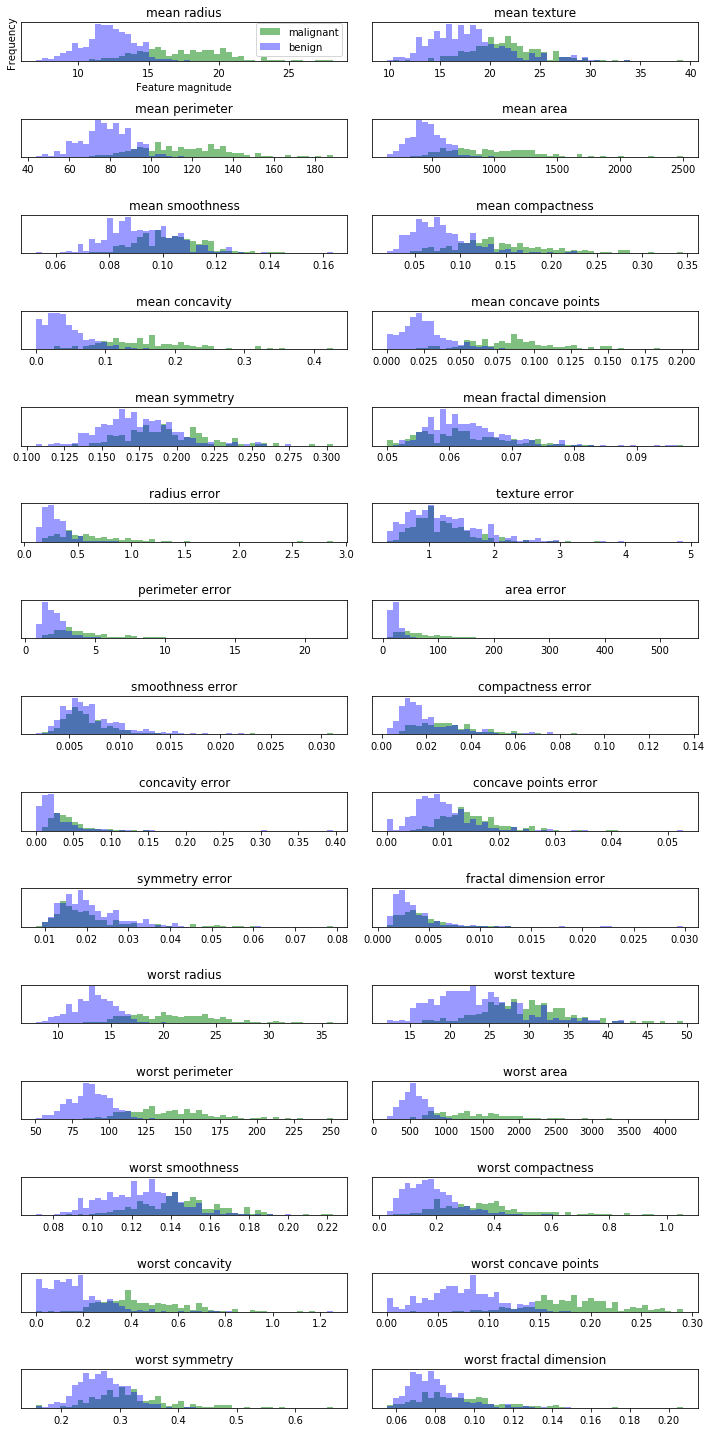

In [15]:
fig , axes  = plt.subplots(15 , 2 , figsize = (10 , 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()
for i in range(30):
    _ , bins = np.histogram(cancer.data[: , i] , bins = 50)
    ax[i].hist(malignant[: , i] , bins = bins , color = 'g' , alpha = 0.5)
    ax[i].hist(benign[: , i] , bins = bins , color = 'b' , alpha = 0.4)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant" , "benign"] , loc = 'best')
fig.tight_layout()

#Here we creat histogram for each of the features
#counting how often a data point appear with a feature in a certain range
#Each plot have two histograms
#One for the malignant class and one for the benign class
#This gives us some idea how the features are distributed among the labels
#for example : "smoothness error" uninformative because the histograms overlay
#"Worst concave points"  quite informative

In [69]:
#plotting the datap point
def plot_data_points(X , y):
    class0 = X[y == 0]
    class1 = X[y == 1]
    plt.scatter(class0[: , 0] , class0[: , 1] , c= 'b', label = "malignant")
    plt.scatter(class1[: , 0] , class1[: , 1] , c= 'r' , marker = '^' , label = "benign")
    plt.xlabel('First principal component')
    plt.ylabel("Second principal component")

In [70]:
#But the above plot does not show any kind of interaction between the features
#Using PCA we can have a slightly better picture
#We can have the two principle components and visualise the data in a 2D space with scatter plot
#Before we apply PCA , we scale our data , so that each feature have the unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)


In [71]:
#now using the pca analysis
#If we want to do dimensional reduction , we need to mention the number of components
#By defualt , it takes all the principal components and rotates the data

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

print("Original dimension : " , X_scaled.shape)
print("Reduced dimension : " , X_pca.shape )

Original dimension :  (569, 30)
Reduced dimension :  (569, 2)


Text(0.5,1,'Data in 2D space using the first two principal components')

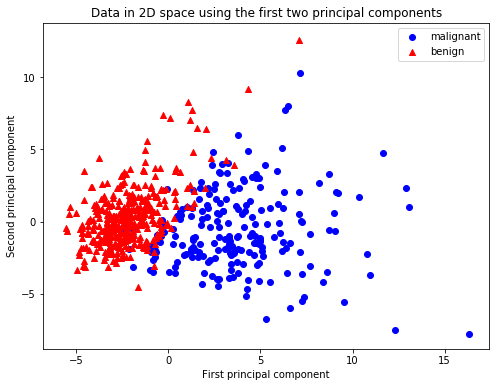

In [76]:
#plotting the first two principal components
plt.figure(figsize = (8 , 6))
plot_data_points(X_pca , cancer.target)
plt.legend()
plt.title('Data in 2D space using the first two principal components')
#This plot shows that even a linear classifier can be used to distinguish between the two plots
#malignant class is more spread out then the benign class

In [78]:
#The two axis in the plot are not very easy to interpret
#These principal components correspond to directions in the original data
#So they are combinations of the original features
#The principal components are stored in the components_ attribute
print("Principal components shape : " , pca.components_.shape)

#Each row correspong to the original principal component
#They are sorted in the order of importance


Principal components shape :  (2, 30)


In [79]:
print("PCA components : \n" ,pca.components_ )

PCA components : 
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0,0.5,'Principal components')

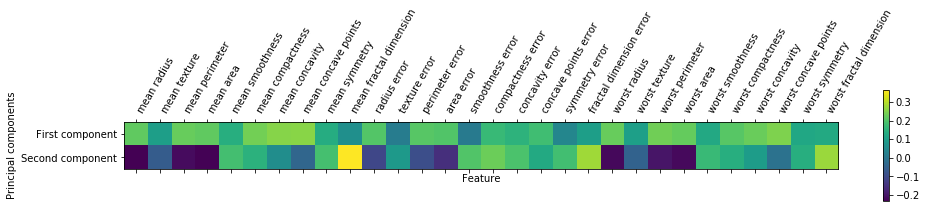

In [85]:
#visualising the components using the heat map
plt.matshow(pca.components_ , cmap = 'viridis')
plt.yticks([0 , 1] , ["First component" , "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)) , cancer.feature_names , rotation = 60 , ha = 'left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

#First principal component have only the positive points , there is a general correlation between all the points
#Second principal component have a mix of the components